# Earth System Data Cube

## The Data Analytics Toolkit for Python

This notebook is describes how to use access the Eart System Data Cube (ESDC) using the Python Data Analytics Toolkit (DAT). It is meant as a starting point for the exploaration and analysis of the ESDC. The Python DAT draws heavily on [xarray](http://xarray.pydata.org/en/stable/), a "pandas-like and pandas-compatible toolkit for analytics on multi-dimensional arrays". Xarray implements the common data model of Netcdf in memory and nicely conserves the strucutre and all metainformation of the data in the ESDC. Thus, the full power of xarray and dask (for out-of-core computation) is immediatley available ot work with ESDC. 

In the following, typical steps a first-time user may take to explore the ESDC and common analytical procedures and visualisations are introduced. Note, however, that this example is b yno means exhaustive - the DAT is full ycompatible with the entire Python ecosystem and therefore offers almost unlimited approahces to specific analyitical needs. 

###  Import the Cablab DAT

In [1]:
#from esdl import Cube
import xarray as xr

###  Access Cube on disk

In [6]:
# run julia notebook "python-interop-part1" bevor or choose an own zarr-file 

#ESDC_path = "/home/jovyan/work/datacube/esdc-31d-1deg-1x180x360-1.0.1_1"
#cube = Cube.open(ESDC_path)
cube = xr.open_zarr("../Julia/data/cube_nomsc")

/tmp/ipykernel_48211/2023348227.py:3: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  cube = xr.open_zarr("../Julia/data/cube_nomsc")


###  Open returns a Cube object 

In [7]:
cube

<xarray.Dataset>
Dimensions:                            (lat: 23, lon: 41, time: 782)
Coordinates:
  * lat                                (lat) float64 54.62 54.38 ... 49.38 49.12
  * lon                                (lon) float64 14.12 14.38 ... 23.88 24.12
  * time                               (time) datetime64[ns] 2001-01-05 ... 2...
Data variables:
    gross_primary_productivity         (lat, lon, time) float32 ...
    net_ecosystem_exchange             (lat, lon, time) float32 ...
    terrestrial_ecosystem_respiration  (lat, lon, time) float32 ...

### List variable names in the Cube

In [9]:
#cube.data.variable_names
cube.variables

Frozen({'gross_primary_productivity': <xarray.Variable (lat: 23, lon: 41, time: 782)>
[737426 values with dtype=float32], 'lat': <xarray.IndexVariable 'lat' (lat: 23)>
array([54.625, 54.375, 54.125, 53.875, 53.625, 53.375, 53.125, 52.875, 52.625,
       52.375, 52.125, 51.875, 51.625, 51.375, 51.125, 50.875, 50.625, 50.375,
       50.125, 49.875, 49.625, 49.375, 49.125])
Attributes:
    _ARRAY_OFFSET:  0, 'lon': <xarray.IndexVariable 'lon' (lon: 41)>
array([14.125, 14.375, 14.625, 14.875, 15.125, 15.375, 15.625, 15.875, 16.125,
       16.375, 16.625, 16.875, 17.125, 17.375, 17.625, 17.875, 18.125, 18.375,
       18.625, 18.875, 19.125, 19.375, 19.625, 19.875, 20.125, 20.375, 20.625,
       20.875, 21.125, 21.375, 21.625, 21.875, 22.125, 22.375, 22.625, 22.875,
       23.125, 23.375, 23.625, 23.875, 24.125])
Attributes:
    _ARRAY_OFFSET:  0, 'net_ecosystem_exchange': <xarray.Variable (lat: 23, lon: 41, time: 782)>
[737426 values with dtype=float32], 'terrestrial_ecosystem_respiration':

###  Data are best handled as xarray datasets. Just like netcdf files, datasets contain dimensions, variables, and further metadata

In [10]:
ESDC = cube #cube.data.dataset()
ESDC

<xarray.Dataset>
Dimensions:                            (lat: 23, lon: 41, time: 782)
Coordinates:
  * lat                                (lat) float64 54.62 54.38 ... 49.38 49.12
  * lon                                (lon) float64 14.12 14.38 ... 23.88 24.12
  * time                               (time) datetime64[ns] 2001-01-05 ... 2...
Data variables:
    gross_primary_productivity         (lat, lon, time) float32 ...
    net_ecosystem_exchange             (lat, lon, time) float32 ...
    terrestrial_ecosystem_respiration  (lat, lon, time) float32 ...

In [11]:
ESDC.gross_primary_productivity

<xarray.DataArray 'gross_primary_productivity' (lat: 23, lon: 41, time: 782)>
[737426 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 54.62 54.38 54.12 53.88 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 14.12 14.38 14.62 14.88 ... 23.38 23.62 23.88 24.12
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 ... 2017-12-31

### The array of values can be also accessed directly

In [12]:
ESDC['lon'].values

array([14.125, 14.375, 14.625, 14.875, 15.125, 15.375, 15.625, 15.875,
       16.125, 16.375, 16.625, 16.875, 17.125, 17.375, 17.625, 17.875,
       18.125, 18.375, 18.625, 18.875, 19.125, 19.375, 19.625, 19.875,
       20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875,
       22.125, 22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875,
       24.125])

###  xarray offers rich set of built-in convenience functions
see the [API reference](http://xarray.pydata.org/en/stable/api.html) for full reference!
### Mean over all dimensions

In [13]:
ESDC.mean(skipna=True)

<xarray.Dataset>
Dimensions:                            ()
Data variables:
    gross_primary_productivity         float32 1.708e-10
    net_ecosystem_exchange             float32 5.337e-11
    terrestrial_ecosystem_respiration  float32 3.469e-11

### Mean over time and latitidue, result is a dataset again

In [14]:
precip_avg = ESDC['gross_primary_productivity'].mean(dim = ["time","lat"], skipna=True)

In [15]:
precip_avg.compute()

<xarray.DataArray 'gross_primary_productivity' (lon: 41)>
array([ 2.3780882e-09,  1.2195324e-09,  1.8292986e-09,  2.3229187e-09,
       -6.9687567e-10, -1.1614594e-09, -6.9687567e-10, -1.5098972e-09,
        3.4843783e-10, -4.4346632e-10, -2.6511573e-10, -5.3023147e-10,
       -4.2418519e-10, -2.6511573e-10,  6.3627775e-10, -3.7116202e-10,
        5.3023148e-11,  3.7116202e-10,  1.1086658e-10, -4.6425380e-10,
        9.1464930e-10, -4.6458376e-10,  6.0976618e-10,  3.3259973e-10,
        1.2327882e-09, -4.9046411e-10, -6.3627775e-10, -3.7116202e-10,
       -5.3023148e-11,  2.6511573e-10, -1.0604629e-09,  1.1399977e-09,
        3.3139466e-10,  0.0000000e+00,  2.0148796e-09,  7.4232404e-10,
       -3.1813888e-10, -5.3023147e-10, -2.1209259e-10, -4.2418519e-10,
        4.2418519e-10], dtype=float32)
Coordinates:
  * lon      (lon) float64 14.12 14.38 14.62 14.88 ... 23.38 23.62 23.88 24.12

###  Simple plotting with xarrays implementation of matplotlib
#### import additional libraries

In [19]:
# install missing libraries
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline

### Select 2d image (lat/lon) given a time as integer index

In [20]:
precip2d = ESDC.gross_primary_productivity.isel(time=123)

In [21]:
precip2d

<xarray.DataArray 'gross_primary_productivity' (lat: 23, lon: 41)>
array([[      nan,       nan,       nan, ...,  0.055447, -0.051936, -0.013639],
       [      nan,       nan,       nan, ...,  0.139509,  0.13978 ,  0.2171  ],
       [      nan,       nan,       nan, ..., -0.040776, -0.153754, -0.173863],
       ...,
       [-1.310423, -1.503565, -1.241582, ..., -0.755525, -0.693929, -0.457915],
       [-1.281345, -1.548761, -1.30843 , ..., -0.545973, -0.484471, -0.526911],
       [-1.504663, -1.448868, -1.182087, ..., -0.5479  , -0.642179, -0.753657]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 54.62 54.38 54.12 53.88 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 14.12 14.38 14.62 14.88 ... 23.38 23.62 23.88 24.12
    time     datetime64[ns] 2003-09-10

### or given a specific date

In [22]:
precip2d = ESDC['gross_primary_productivity'].sel(time='2007-04-12T12:00:00', method = 'nearest')
precip2d

<xarray.DataArray 'gross_primary_productivity' (lat: 23, lon: 41)>
array([[     nan,      nan,      nan, ..., 0.308466, 0.158772, 0.260583],
       [     nan,      nan,      nan, ..., 0.255066, 0.336795, 0.281583],
       [     nan,      nan,      nan, ..., 0.23086 , 0.218441, 0.159733],
       ...,
       [1.79131 , 1.28009 , 1.274715, ..., 0.180167, 0.155869, 0.137467],
       [1.767751, 1.706882, 1.337957, ..., 0.13717 , 0.104789, 0.208607],
       [1.824734, 1.663509, 1.68606 , ..., 0.111178, 0.10744 , 0.162099]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 54.62 54.38 54.12 53.88 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 14.12 14.38 14.62 14.88 ... 23.38 23.62 23.88 24.12
    time     datetime64[ns] 2007-04-11

In [23]:
precip1d = ESDC['gross_primary_productivity'].sel(lon = 12.67,lat = 41.83, method = 'nearest')  

#### Plot 2d image with matplotlib

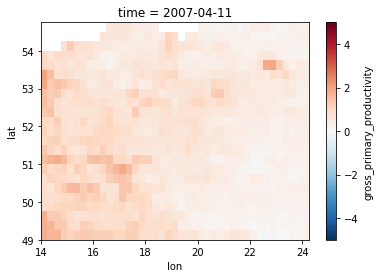

In [24]:
precip2d.plot.pcolormesh(vmax = 5)

#### Time-series at a given location (here ESRIN), and histogram lf values

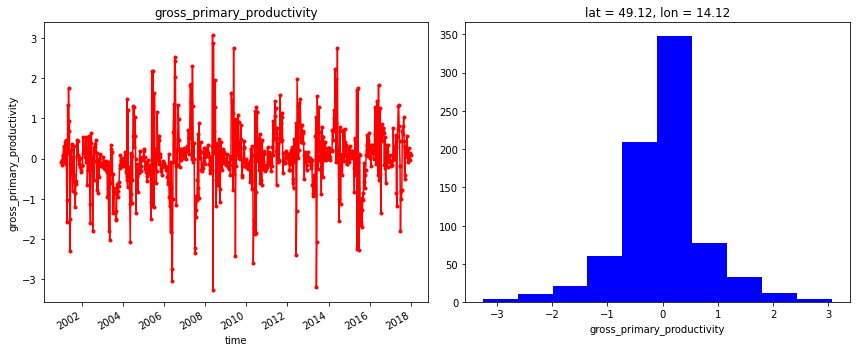

In [34]:
fig, ax = plt.subplots(figsize = [12,5], ncols=2)

precip1d.plot(ax = ax[0], color ='red', marker ='.')
ax[0].set_title("gross_primary_productivity")
precip1d.plot.hist(ax = ax[1], color ='blue')
ax[1].set_xlabel("gross_primary_productivity")
plt.tight_layout()

### Make use of the known and stable strucutre of all data in the ESDC and create high-level methods for visualization


In [30]:
pip install basemap

     |████████████████████████████████| 862 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 30.5 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 3.9 MB/s eta 0:00:01     |████████████                    | 2.2 MB 3.0 MB/s eta 0:00:02
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37262 sha256=1bc8848cf57130f9ab2f0503816b4b8df3a92107dfbe4755890b7eeba31e4d67
  Stored in directory: /home/anja/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp
Note: you may need to restart the kernel to use updated packages.


In [31]:
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [134]:
def map_plot(ds, var=None, time = 0, title_str='No title', **kwargs):
    ''' 
    Expects a data set and a variable name to plot
    
    '''
    if isinstance(time,int):
        res = ds[var].isel(time=time)
    elif time is None:
        res = ds[var]
        time = None
    else: 
        try: 
            res = ds[var].sel(time=time,method='nearest')
        except: 
            print("Wrong date format, should be YYYY-MM-DD")
            raise    
   
    lons, lats = np.meshgrid(np.array(res.lon),np.array(res.lat))
    ma_res = np.ma.array(res, mask =np.isnan(res))
    # colorvalues need to be of dimension-1 of the coordinates
    ma_res = ma_res[:-1,:-1]
    
    if "vmin" in kwargs:
        vmin = kwargs["vmin"] 
    else:
        vmin = None
    if "vmax" in kwargs:
        vmax = kwargs["vmax"] 
    else:
        vmax = None
    if title_str == "No title":
        title_str = var + ' ' +str(time)
    else:
        title_str = title_str + ' ' +str(res.time.values)[0:10]
        
    fig = plt.figure()
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='kav7',lon_0=0,resolution=None)
    m.drawmapboundary(fill_color='0.3')
    ccmap = plt.cm.jet
    ccmap.set_bad("gray",1.)
    im = m.pcolormesh(lons,lats,ma_res,shading='flat',cmap=ccmap,latlon=True, vmin = vmin, vmax=vmax)
    # lay-out 
    m.drawparallels(np.arange(-90.,90.,30.))
    m.drawmeridians(np.arange(-180.,180.,60.))
    cb = m.colorbar(im,"bottom", size="5%", pad="2%")
    #cb.set_label(ds[var].attrs['standard_name']+' ('+ds[var].attrs['units']+')')
    cb.set_label(var +' ('+str(ds[var].dtype)+')')
    ax.set_title(title_str)
    # write to disk if specified 
    if "plot_me" in kwargs:
        if kwargs["plot_me"] == True:
            plt.savefig(title_str[0:15] + '.png',dpi = 600)
            
    fig.set_size_inches(8,12)
    return fig ,ax, m

In [135]:
def DAT_corr(ds, var1 = None, var2 = None, dim ='time'):
   
    if not isinstance(ds,xr.Dataset):
        print('Input object ',ds,' is no xarray Dataset!')
        var1 = None

    if var1 is not None:  
        if var2 is None: 
            var2 = var1  
        ds_tmean = ds.mean(skipna=True, dim = dim)
        ds_tstd =  ds.std(skipna=True, dim = dim)
        covar_1 = (ds[var1] - ds_tmean[var1])*(ds[var2] - ds_tmean[var2])
        res = covar_1.mean(dim= 'time', skipna=True)/(ds_tstd[var1]*ds_tstd[var2])
    else: 
        res = None
        
    return res

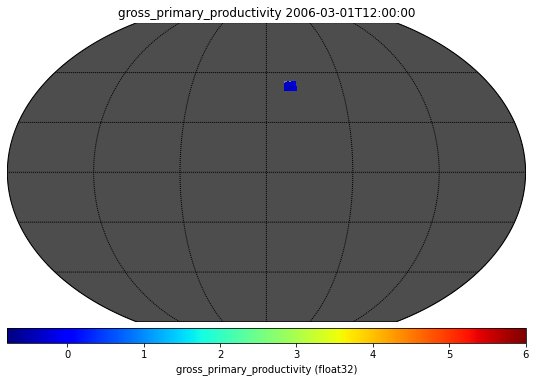

In [136]:
fig, ax, m = map_plot(ESDC,'gross_primary_productivity','2006-03-01T12:00:00',vmax = 6.)


#### Subsetting geographical sub-region. Note that the slice of the latitude dimension has to be in reverse order.

In [127]:
ESDC['gross_primary_productivity']

<xarray.DataArray 'gross_primary_productivity' (lat: 23, lon: 41, time: 782)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 0.058912, -0.026571, ...,  0.00657 , -0.001915],
        [ 0.059553, -0.013286, ..., -0.034945,  0.015412]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 0.005051, -0.00581 , ..., -0.004125,  0.032686],
        [-0.007113,  0.005434, ..., -0.020178,  0.013612]],

       ...,

       [[-0.100094, -0.198459, ..., -0.030231,  0.077043],
        [-0.079165, -0.198367, ...,  0.087689,  0.02037 ],
        ...,
        [ 0.066783, -0.053586, ...,  0.19768 ,  0.07492 ],
        [ 0.129052, -0.057117, ...,  0.133582,  0.065446]],

       [[-0.084246, -0.167516, ...,  0.146473,  0.083397],
        [-0.083255, -0.183856, ...,  0.199603,  0.011165],
        ...,
        [ 0.14875 , -0.041844, ...,  0.316499,  0.019743],
        [ 0.096187, -0.0429  , ...,  0.25693 ,  0.033356]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 54.62 54.38 54.12 53.88 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 14.12 14.38 14.62 14.88 ... 23.38 23.62 23.88 24.12
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 ... 2017-12-31

In [36]:
Europe = ESDC.sel(lat = slice(70.,30.), lon = slice(-20.,35.))

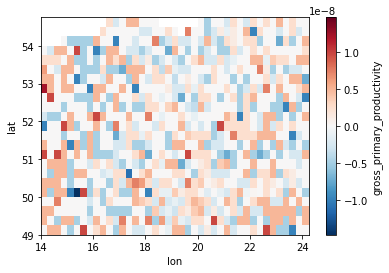

In [37]:
Europe.mean(dim='time',skipna=True).gross_primary_productivity.plot()

#### Seasonal averages

In [42]:
#Air_temp_monthly = Europe.air_temperature_2m.groupby('time.month').mean(dim='time')
Air_temp_monthly = Europe.gross_primary_productivity.groupby('time.month').mean(dim='time')

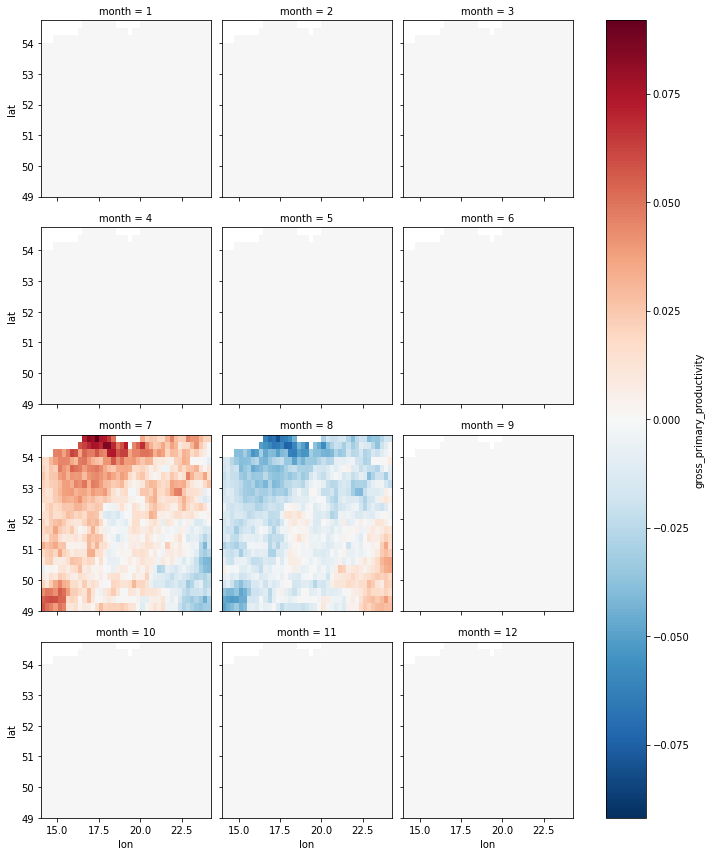

In [43]:
Air_temp_monthly.plot.imshow(x='lon',y='lat',col='month',col_wrap=3)

#### Zscores

In [44]:
Europe_zscore = (Europe-Europe.mean(dim='time'))/Europe.std(dim='time')

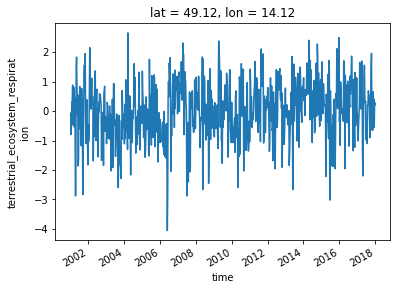

In [45]:
ESRIN_zscore = Europe_zscore.sel(lon = 12.67,lat = 41.83, method = 'nearest')
ESRIN_zscore.terrestrial_ecosystem_respiration.plot()

#### Using apply() to apply any arbitrary function to all variables in the dataset

In [46]:
Europe.apply(np.nanmax)

<xarray.Dataset>
Dimensions:                            ()
Data variables:
    gross_primary_productivity         float32 4.874
    net_ecosystem_exchange             float32 3.387
    terrestrial_ecosystem_respiration  float32 1.326

### Define own fucntion for anomaly detection. 

In [47]:
def above_Nsigma(x,Nsigma):
    return xr.ufuncs.fabs(x)>Nsigma

In [48]:
res = Europe_zscore.apply(above_Nsigma,Nsigma = 2)

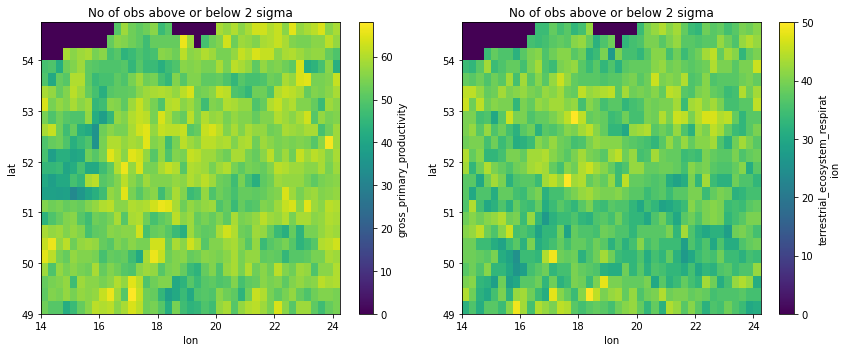

In [49]:
fig2, ax2 = plt.subplots(figsize = [12,5], ncols=2)

res["gross_primary_productivity"].sum(dim="time").plot(ax = ax2[0])
ax2[0].set_title("No of obs above or below 2 sigma")

res["terrestrial_ecosystem_respiration"].sum(dim="time").plot(ax = ax2[1])
ax2[1].set_title("No of obs above or below 2 sigma")

plt.tight_layout()



<AxesSubplot:>

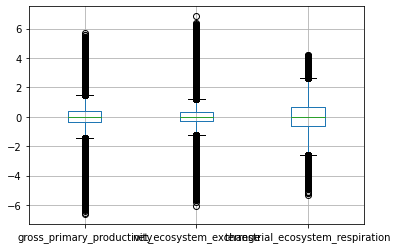

In [50]:
df = Europe_zscore.to_dataframe()
df.boxplot(column=["gross_primary_productivity","net_ecosystem_exchange","terrestrial_ecosystem_respiration"])

In [51]:
df

gross_primary_productivity  net_ecosystem_exchange  \
lat    lon    time                                                             
54.625 14.125 2001-01-05                         NaN                     NaN   
              2001-01-13                         NaN                     NaN   
              2001-01-21                         NaN                     NaN   
              2001-01-29                         NaN                     NaN   
              2001-02-06                         NaN                     NaN   
...                                              ...                     ...   
49.125 24.125 2017-11-29                   -0.079129                0.037142   
              2017-12-07                    0.149897                0.085813   
              2017-12-15                   -0.092478               -0.065217   
              2017-12-23                    0.387561                0.299183   
              2017-12-31                    0.050316                0.252372   

                          terrestrial_ecosystem_respiration  
lat    lon    time                                           
54.625 14.125 2001-01-05                                NaN  
              2001-01-13                                NaN  
              2001-01-21                                NaN  
              2001-01-29                                NaN  
              2001-02-06                                NaN  
...                                                     ...  
49.125 24.125 2017-11-29                          -0.325625  
              2017-12-07                           0.893011  
              2017-12-15                          -0.329938  
              2017-12-23                           1.564298  
              2017-12-31                           0.301711  

[737426 rows x 3 columns]

<AxesSubplot:>

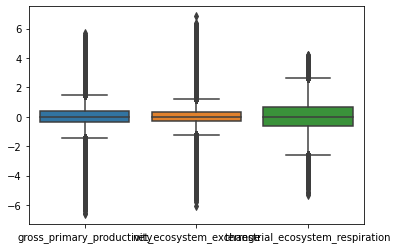

In [53]:
sn.boxplot(data = df[['gross_primary_productivity','net_ecosystem_exchange','terrestrial_ecosystem_respiration']])

### Compute correlationbetween arbitrary variables in the ESDC

In [56]:
cv = DAT_corr(ESDC, 'gross_primary_productivity','net_ecosystem_exchange')

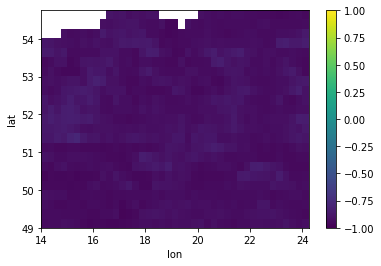

In [57]:
cv.plot.imshow(vmin = -1., vmax = 1.)

#### Test if function works as expected: correlation of var with itself should be 1.

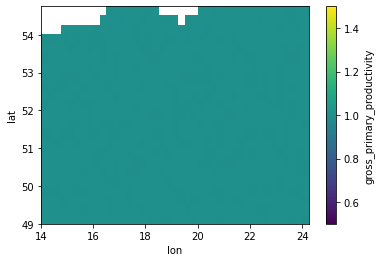

In [58]:
cv2 = DAT_corr(ESDC, 'gross_primary_productivity', 'gross_primary_productivity')
cv2.plot.imshow(vmin = 0.5, vmax = 1.5)